Use load_from_local loader


/home/deep/DL_project/Segformer_RARP50/mmseg/models/segmentors/base.py:268: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


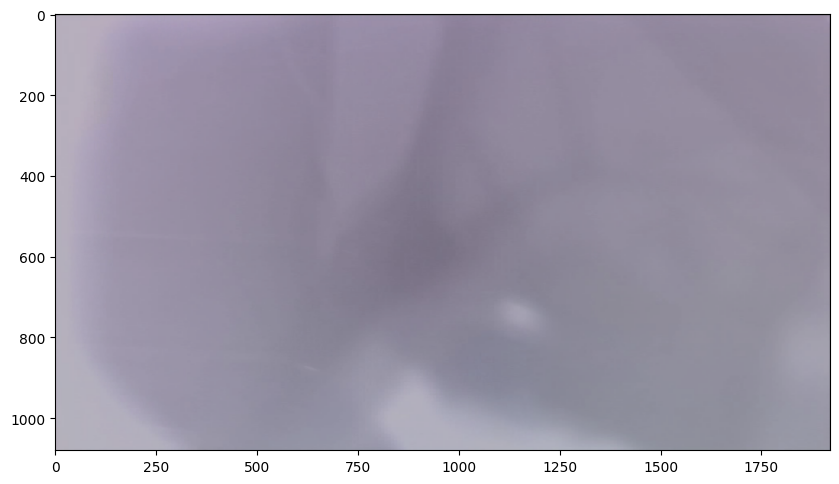

In [1]:
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image
import sys
import os
import time

# fix problem with local packages
cur_dir = os.getcwd()
sys.path.append(os.path.dirname(cur_dir))

root_dir = '/media/deep/Transcend/sar-rarp-dataset/traindata/video_6.zip/'
seg_dir = 'segmentation/'
rgb_dir = 'rgb/'

f_name_list = []
for seg_name in glob.glob(root_dir + seg_dir + '*.png'):
    rgb_name = glob.glob(root_dir + rgb_dir + seg_name.split('/')[-1])[0]
    f_name_list.append([rgb_name, seg_name])

colors = ['tab:gray', 'tab:red', 'tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']
palette_dict = {i: mpl.colors.to_rgb(c) for i, c in enumerate(colors)}
classes = ("Anatomy", "Tool clasper", "Tool wrist", "Tool shaft", "Suturing needle", "Thread", "Suction tool", "Needle Holder", "Clamps", "Catheter")

from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

config_file = './segformer.b1.512x512.rarp50.160k/segformer.b1.512x512.rarp50.160k.py'
checkpoint_file = './segformer.b1.512x512.rarp50.160k/latest.pth'

idx = 29

model = init_segmentor(config_file, checkpoint_file, device='cuda:0')
img_dir = f_name_list[idx][0]
result = inference_segmentor(model, img_dir)
palette = np.array([mpl.colors.to_rgb(c) for c in colors])*255

show_result_pyplot(model, img_dir, result, palette.astype(int), (10,6))
